<a href="https://colab.research.google.com/github/ShazedaOni/SER-Project-defence/blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [2]:
!pip install librosa

In [3]:
# pip install librosa
# linear algebra
import numpy as np
# data processing, CSV file I/O(e.g pd.read_CSV)
import pandas as pd
# to use operating systems dependent functionality
import os
# to extract speech features
import librosa
# read and write WAV files
import wave
# to generate the visualizations
import matplotlib.pyplot as plt

# NLP classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


# LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

print("loaded libraries")

loaded libraries


In [4]:
%pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
pip install --upgrade scikit-learn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
def extract_mfcc(wav_file_name):
  #This function extracts mfcc features and obtain the mean of each dimension
  #Input : path_to_wav_file
  #output: mfcc_features'''
  y, sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

  return mfccs

In [14]:
##### load radvess speech data #####
import os
def extract_mfcc(wav_file_name):
  #This function extracts mfcc features and obtain the mean of each dimension
  #Input : path_to_wav_file
  #output: mfcc_features'''
  y, sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

  return mfccs
  pass
radvess_speech_labels = []  # to save extracted label/file
ravdess_speech_data = []    # to save extracted features/file

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio'):
    for filename in filenames: #print(os.path.join(dirname, filename))
       radvess_speech_labels.append(int(''.join(filter(str.isdigit, filename[7:9]))) - 1)
  # the index 7 and 8 of the file name represent the emotion label
       wav_file_name = os.path.join(dirname, filename)
       ravdess_speech_data.append(extract_mfcc(wav_file_name))  # extract MFCC features/files
print("Finish loading the dataset")

Finish loading the dataset


In [15]:
radvess_speech_labels = []  # to save extracted label/file
ravdess_speech_data = []    # to save extracted features/file

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio'):
    for filename in filenames:
        # Assuming the emotion label is represented by the digits in the filename
        label_str = ''.join(filter(str.isdigit, filename[7:9]))
        if label_str:
            label = int(label_str) - 1
            radvess_speech_labels.append(label)

            wav_file_name = os.path.join(dirname, filename)
            ravdess_speech_data.append(extract_mfcc(wav_file_name))

print("Finish loading the dataset")


Finish loading the dataset


In [16]:
pip install pydub

In [7]:
import librosa

In [17]:
import numpy as np


In [18]:
# Assuming you have a cell where you define radvess_speech_data
#ravdess_speech_data = [1.0, 2.0, 3.0, 4.0]

# Now, in a different cell or later in the same cell
ravdess_speech_data  # This should work without any error


[array([-6.4711743e+02,  6.3513783e+01,  6.0400691e+00,  1.5049635e+01,
         1.2956362e+01,  8.2202587e+00,  6.2446737e+00, -2.6909750e+00,
        -2.2044039e+00,  4.0563197e+00,  6.7914456e-01, -6.2349839e-03,
         5.6387024e+00,  1.7890096e+00, -4.9631253e-01,  4.5108417e-01,
         1.5634812e-01, -1.0800631e+00,  3.1827372e-01,  2.3332336e+00,
        -2.4909649e+00,  1.7008570e+00, -2.9470370e+00,  9.4965285e-01,
        -1.3549668e+00,  2.5824103e-01, -2.3430974e+00, -6.3837510e-01,
        -3.3007417e+00,  4.6381053e-01, -6.2562925e-01,  5.2523470e-01,
        -8.3294779e-01,  6.3879633e-01, -1.7731497e+00, -1.0632255e+00,
        -1.9634678e+00, -2.4678042e+00, -2.6598201e+00, -1.0416654e+00],
       dtype=float32),
 array([-4.8546030e+02,  3.8731350e+01, -5.7136259e+00,  4.8874784e+00,
        -5.4716122e-01,  5.1731634e+00, -4.6637883e+00, -9.0268354e+00,
        -7.2447758e+00, -2.7367918e-02, -9.0455776e-01, -6.4002790e+00,
         1.0298618e+00, -3.7416265e+00, 

In [19]:
##### convert data and label to array #####
from keras.utils import to_categorical
ravdess_speech_data_array = np.asarray(ravdess_speech_data)  # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape  # get tuple of array dimensions

##### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) #convert a class vector (integer) to binary class matrix
labels_categorical.shape

(2882, 8)

In [20]:
ravdess_speech_data_array.shape

(2882, 40)

In [21]:
print(ravdess_speech_data_array.shape)
print(labels_categorical.shape)

(2882, 40)
(2882, 8)


In [22]:
from sklearn.model_selection import train_test_split

# Assuming ravdess_speech_data_array and labels_categorical are defined
print(ravdess_speech_data_array.shape)
print(labels_categorical.shape)

# Now, try using train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(ravdess_speech_data_array), labels_categorical, test_size=0.20, random_state=9)


(2882, 40)
(2882, 8)


In [23]:
# Split the training, validation, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.7)
validation_samples = int(number_of_samples * 0.15)
test_samples = int(number_of_samples * 0.15)

In [24]:
#Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences = False, input_shape = (40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    #configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
    return model

In [25]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [ ]:
w.shape

(2017, 40, 1)

In [26]:
### train using LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [27]:
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Activation
model_A = create_model_LSTM()
history = model_A.fit(
    np.expand_dims(ravdess_speech_data_array[:training_samples], -1),
    labels_categorical[:training_samples],
    validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples: training_samples + validation_samples], -1),
                     labels_categorical[training_samples: training_samples + validation_samples]),
    epochs=130,
    shuffle=True
)


Epoch 1/130
64/64 [==============================] - 7s 19ms/step - loss: 2.0758 - accuracy: 0.1453 - val_loss: 2.0489 - val_accuracy: 0.1690
Epoch 2/130
64/64 [==============================] - 0s 7ms/step - loss: 2.0455 - accuracy: 0.1641 - val_loss: 1.9898 - val_accuracy: 0.1736
Epoch 3/130
64/64 [==============================] - 0s 7ms/step - loss: 2.0102 - accuracy: 0.1815 - val_loss: 1.9583 - val_accuracy: 0.1921
Epoch 4/130
64/64 [==============================] - 0s 7ms/step - loss: 1.9885 - accuracy: 0.1948 - val_loss: 1.8924 - val_accuracy: 0.2176
Epoch 5/130
64/64 [==============================] - 0s 6ms/step - loss: 1.9571 - accuracy: 0.2127 - val_loss: 1.8763 - val_accuracy: 0.2407
Epoch 6/130
64/64 [==============================] - 0s 7ms/step - loss: 1.9300 - accuracy: 0.2340 - val_loss: 1.8435 - val_accuracy: 0.2593
Epoch 7/130
64/64 [==============================] - 0s 6ms/step - loss: 1.9025 - accuracy: 0.2325 - val_loss: 1.9320 - val_accuracy: 0.2546
Epoch 8/130


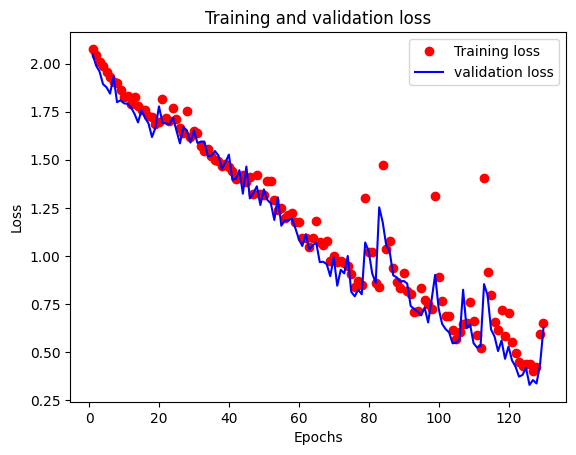

In [28]:
### loss plots using LSTM model
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
pip install matplotlib


In [30]:
pip install matplotlib librosa IPython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00


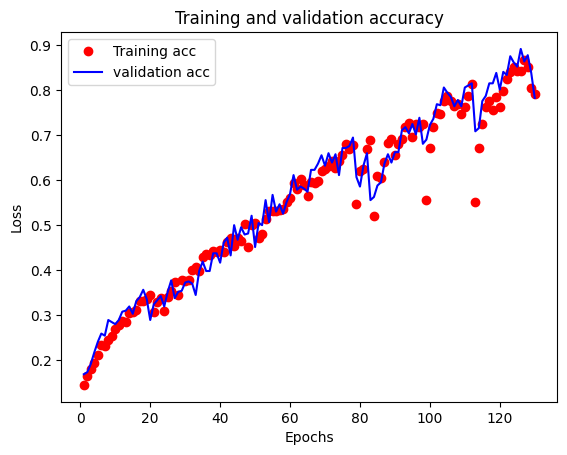

In [31]:
### accuracy plots using LSTM model
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [32]:
### evaluation using model A
# Assuming 'model_A' is your Sequential model
evaluation_results = model_A.evaluate(
    np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1),
    labels_categorical[training_samples + validation_samples:]
)

# Print the evaluation results
print("Loss:", evaluation_results[0])
print("Accuracy:", evaluation_results[1])


14/14 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.7783
Loss: 0.7003630995750427
Accuracy: 0.7782909870147705


In [33]:
emotions= {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}
def predict(wav_filepath):
   test_point= extract_mfcc(wav_filepath)
   test_point= np.reshape(test_point, newshape=(1,40,1))
   predictions = model_A.predict(test_point)
   print(emotions[np.argmax(predictions[0])+1])

In [34]:
emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict(wav_filepath):
    test_point = extract_mfcc(wav_filepath)
    test_point = np.reshape(test_point, newshape=(1, 40, 1))
    predictions = model_A.predict(test_point)
    predicted_emotion = emotions[np.argmax(predictions[0]) + 1]
    return predicted_emotion

# Example usage:
wav_filepath = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_22/03-01-01-01-01-01-22.wav'
predicted_emotion = predict(wav_filepath)
print(predicted_emotion)


1/1 [==============================] - 1s 604ms/step
neutral


In [35]:
wav_filepath = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-01-01-01-01-01.wav'
predicted_emotion = predict(wav_filepath)
print(predicted_emotion)

1/1 [==============================] - 0s 24ms/step
calm


In [36]:
wav_filepath = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/OAF_angry/OAF_back_angry.wav'
predicted_emotion = predict(wav_filepath)
print(predicted_emotion)

1/1 [==============================] - 0s 24ms/step
happy


In [ ]:
wav_filepath= '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_10/03-01-01-01-01-01-10.wav'
predicted_emotion = predict(wav_filepath)
print(predicted_emotion)

1/1 [==============================] - 0s 29ms/step
neutral


In [ ]:
wav_filepath= '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_10/03-01-02-01-02-01-10.wav'
predicted_emotion = predict(wav_filepath)
print(predicted_emotion)

1/1 [==============================] - 0s 41ms/step
calm


In [ ]:
wav_filepath= '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-03-02-02-02-01.wav'
predicted_emotion = predict(wav_filepath)
print(predicted_emotion)

1/1 [==============================] - 0s 26ms/step
happy


In [ ]:

predict=('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-01-01-01-02-01.wav')


# New Section

In [37]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for actor_folder in os.listdir(wav_folder):
        actor_path = os.path.join(wav_folder, actor_folder)
        if os.path.isdir(actor_path):
            for file_name in os.listdir(actor_path):
                if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac')):  # Adjust based on your file extensions
                    wav_filepath = os.path.join(actor_path, file_name)
                    print(f'File: {wav_filepath}')
                    predicted_emotion = predict(wav_filepath)
                    print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/'
predict_and_show(wav_folder)


Streaming output truncated to the last 5000 lines.
File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-08-02-01-02-01.wav
1/1 [==============================] - 0s 32ms/step
Predicted Emotion: surprised

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_04/03-01-01-01-02-01-04.wav
1/1 [==============================] - 0s 25ms/step
Predicted Emotion: neutral

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_04/03-01-02-01-01-01-04.wav
1/1 [==============================] - 0s 33ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_04/03-01-02-01-02-02-04.wav
1/1 [==============================] - 0s 39ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_04/03-01-01-01-02-02-04.wav
1/1 [==============================] - 0s 27ms/step
Predicted Emotion: neutral

File: /conten

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_count(wav_folder):
    emotion_counts = {emotion: 0 for emotion in emotions.values()}

    for actor_folder in os.listdir(wav_folder):
        actor_path = os.path.join(wav_folder, actor_folder)
        if os.path.isdir(actor_path):
            for file_name in os.listdir(actor_path):
                if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac')):  # Adjust based on your file extensions
                    wav_filepath = os.path.join(actor_path, file_name)
                    predicted_emotion = predict(wav_filepath)
                    emotion_counts[predicted_emotion] += 1

    return emotion_counts

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/'
emotion_counts = predict_and_count(wav_folder)
print(emotion_counts)


1/1 [==============================] - 0s 43ms/step
{'neutral': 100, 'calm': 483, 'happy': 210, 'sad': 666, 'angry': 192, 'fearful': 385, 'disgust': 217, 'surprised': 196}


In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/MyDataset/'
predict_and_show(wav_folder)


File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/MyDataset/WhatsApp Ptt 2024-01-09 at 10.23.57 PM (1).ogg
1/1 [==============================] - 0s 30ms/step
Predicted Emotion: surprised

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/MyDataset/WhatsApp Ptt 2024-01-09 at 10.23.18 PM (1).ogg
1/1 [==============================] - 0s 38ms/step
Predicted Emotion: sad

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/MyDataset/WhatsApp Ptt 2024-01-09 at 10.47.06 PM (1).ogg
1/1 [==============================] - 0s 36ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/MyDataset/WhatsApp Audio 2024-01-21 at 7.37.14 PM.mpeg
1/1 [==============================] - 0s 33ms/step
Predicted Emotion: fearful

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/MyDataset/WhatsApp Audio 2024-01-21 at 7.37.18 PM.mpeg
1/1 [============================

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/WhatsApp Ptt 2024-01-09 at 10.23.18 PM.ogg'
predict_and_show(wav_folder)


In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_05'
predict_and_show(wav_folder)


File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_05/03-01-01-01-02-01-05.wav
1/1 [==============================] - 0s 44ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_05/03-01-02-02-01-02-05.wav
1/1 [==============================] - 0s 36ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_05/03-01-02-01-01-01-05.wav
1/1 [==============================] - 0s 28ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_05/03-01-01-01-01-02-05.wav
1/1 [==============================] - 0s 25ms/step
Predicted Emotion: neutral

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_05/03-01-03-01-02-02-05.wav
1/1 [==============================] - 0s 43ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-aud

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show_specific(wav_filepath):
    if os.path.isfile(wav_filepath) and wav_filepath.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):
        print(f'File: {wav_filepath}')
        predicted_emotion = predict(wav_filepath)
        print(f'Predicted Emotion: {predicted_emotion}\n')
    else:
        print(f'Invalid file path or unsupported file format: {wav_filepath}')

# Example usage:
wav_filepath = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/MyDataset/whatsapp2.wav'
predict_and_show_specific(wav_filepath)


File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/MyDataset/whatsapp2.wav
1/1 [==============================] - 0s 31ms/step
Predicted Emotion: surprised



In [ ]:
# Example usage:
wav_filepath = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/WhatsApp Ptt 2024-01-23 at 9.35.22 PM.ogg'
predict_and_show_specific(wav_filepath)

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/WhatsApp Ptt 2024-01-23 at 9.35.22 PM.ogg
1/1 [==============================] - 0s 30ms/step
Predicted Emotion: neutral



1/1 [==============================] - 0s 44ms/step
neutral: 4.08%
calm: 19.72%
happy: 8.57%
sad: 27.19%
angry: 7.84%
fearful: 15.72%
disgust: 8.86%
surprised: 8.00%


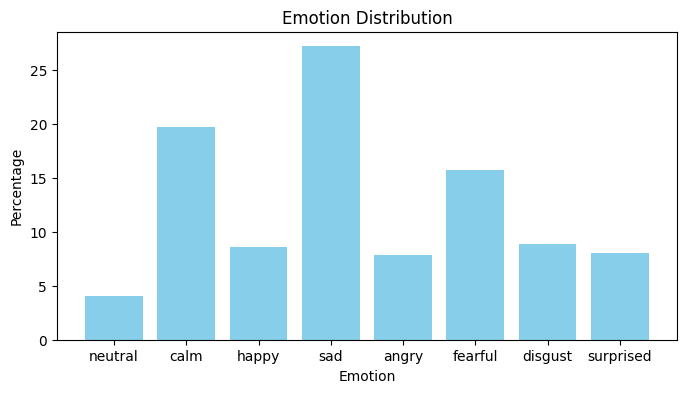

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_count(wav_folder):
    total_files = 0
    emotion_counts = {emotion: 0 for emotion in emotions.values()}

    for actor_folder in os.listdir(wav_folder):
        actor_path = os.path.join(wav_folder, actor_folder)
        if os.path.isdir(actor_path):
            for file_name in os.listdir(actor_path):
                if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac')):  # Adjust based on your file extensions
                    total_files += 1
                    wav_filepath = os.path.join(actor_path, file_name)
                    predicted_emotion = predict(wav_filepath)
                    emotion_counts[predicted_emotion] += 1

    # Calculate percentages
    emotion_percentages = {emotion: count / total_files * 100 for emotion, count in emotion_counts.items()}

    return emotion_percentages

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/'
emotion_percentages = predict_and_count(wav_folder)

# Display results in percentage
for emotion, percentage in emotion_percentages.items():
    print(f'{emotion}: {percentage:.2f}%')

# Create a bar chart
emotions_labels = list(emotion_percentages.keys())
percentages_values = list(emotion_percentages.values())

plt.figure(figsize=(8, 4))
plt.bar(emotions_labels, percentages_values, color='skyblue')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Percentage')
plt.show()


In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/OAF_angry'
predict_and_show(wav_folder)


File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/OAF_angry/OAF_book_angry.wav
1/1 [==============================] - 0s 26ms/step
Predicted Emotion: sad

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/OAF_angry/OAF_bone_angry.wav
1/1 [==============================] - 0s 27ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/OAF_angry/OAF_base_angry.wav
1/1 [==============================] - 0s 29ms/step
Predicted Emotion: sad

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/OAF_angry/OAF_bar_angry.wav
1/1 [==============================] - 0s 26ms/step
Predicted Emotion: sad

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/OAF_angry/OAF_bite_angry.wav
1/1 [==============================] - 0s 26ms/step
Predicted Emotion: sad

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/OAF_angry/OAF_boat_angry.wav
1/

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_06'
predict_and_show(wav_folder)


File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_06/03-01-02-02-01-01-06.wav
1/1 [==============================] - 0s 25ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_06/03-01-01-01-01-02-06.wav
1/1 [==============================] - 0s 29ms/step
Predicted Emotion: neutral

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_06/03-01-03-02-02-01-06.wav
1/1 [==============================] - 0s 28ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_06/03-01-03-02-01-02-06.wav
1/1 [==============================] - 0s 27ms/step
Predicted Emotion: angry

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_06/03-01-03-02-02-02-06.wav
1/1 [==============================] - 0s 34ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-a

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_07'
predict_and_show(wav_folder)


File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_07/03-01-03-02-01-02-07.wav
1/1 [==============================] - 0s 25ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_07/03-01-01-01-02-01-07.wav
1/1 [==============================] - 0s 25ms/step
Predicted Emotion: neutral

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_07/03-01-04-01-02-02-07.wav
1/1 [==============================] - 0s 24ms/step
Predicted Emotion: sad

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_07/03-01-03-01-02-02-07.wav
1/1 [==============================] - 0s 24ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_07/03-01-02-01-02-01-07.wav
1/1 [==============================] - 0s 24ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-aud

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_08'
predict_and_show(wav_folder)

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-01-01-01-02-08.wav
1/1 [==============================] - 0s 28ms/step
Predicted Emotion: neutral

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-01-01-02-01-08.wav
1/1 [==============================] - 0s 26ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-01-01-01-01-08.wav
1/1 [==============================] - 0s 29ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-02-02-02-01-08.wav
1/1 [==============================] - 0s 30ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-05-01-01-02-08.wav
1/1 [==============================] - 0s 30ms/step
Predicted Emotion: angry

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-aud

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_09'
predict_and_show(wav_folder)

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_09/03-01-02-01-02-02-09.wav
1/1 [==============================] - 0s 31ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_09/03-01-02-01-01-02-09.wav
1/1 [==============================] - 0s 30ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_09/03-01-02-01-01-01-09.wav
1/1 [==============================] - 0s 30ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_09/03-01-01-01-02-01-09.wav
1/1 [==============================] - 0s 29ms/step
Predicted Emotion: neutral

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_09/03-01-02-02-01-01-09.wav
1/1 [==============================] - 0s 31ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audi

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_10'
predict_and_show(wav_folder)

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_10/03-01-02-02-02-02-10.wav
1/1 [==============================] - 0s 31ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_10/03-01-03-02-01-02-10.wav
1/1 [==============================] - 0s 28ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_10/03-01-04-01-01-02-10.wav
1/1 [==============================] - 0s 32ms/step
Predicted Emotion: sad

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_10/03-01-02-01-01-01-10.wav
1/1 [==============================] - 0s 32ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_10/03-01-03-02-02-02-10.wav
1/1 [==============================] - 0s 33ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_11'
predict_and_show(wav_folder)

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_11/03-01-02-02-02-02-11.wav
1/1 [==============================] - 0s 35ms/step
Predicted Emotion: calm

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_11/03-01-01-01-01-02-11.wav
1/1 [==============================] - 0s 44ms/step
Predicted Emotion: neutral

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_11/03-01-03-01-01-02-11.wav
1/1 [==============================] - 0s 42ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_11/03-01-04-02-01-02-11.wav
1/1 [==============================] - 0s 36ms/step
Predicted Emotion: sad

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_11/03-01-03-02-01-02-11.wav
1/1 [==============================] - 0s 48ms/step
Predicted Emotion: happy

File: /content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-aud

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_12'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_13'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_14'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_15'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_16'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_17'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_18'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_19'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_20'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_21'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_22'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_23'
predict_and_show(wav_folder)

In [ ]:
import os
import numpy as np

emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict_and_show(wav_folder):
    for file_name in os.listdir(wav_folder):
        if file_name.lower().endswith(('.wav', '.mp3', '.ogg', '.flac', '.aac', '.mpeg')):  # Adjust based on your file extensions
            wav_filepath = os.path.join(wav_folder, file_name)
            print(f'File: {wav_filepath}')
            predicted_emotion = predict(wav_filepath)
            print(f'Predicted Emotion: {predicted_emotion}\n')

# Example usage:
wav_folder = '/content/drive/MyDrive/Colab_Notebooks/ravdess-speech-emotion-audio/Actor_24'
predict_and_show(wav_folder)

In [ ]:
import matplotlib.pyplot as plt

# Your emotion_percentages dictionary
emotion_percentages = {
    'neutral': 6.67,
    'calm': 13.33,
    'happy': 10.00,
    'sad': 10.00 ,
    'angry': 15.00 ,
    'fearful': 21.67,
    'disgust': 11.67,
    'surprised': 11.67
}

# Extract emotions and percentages for plotting
emotions = list(emotion_percentages.keys())
percentages = list(emotion_percentages.values())

# Plotting
plt.bar(emotions, percentages, color='blue')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.show()


In [ ]:
#neutral': 115, 'calm': 323, 'happy': 269, 'sad': 624, 'angry': 193, 'fearful': 485, 'disgust': 225, 'surprised': 212
import matplotlib.pyplot as plt

# Your emotion_percentages dictionary
emotion_percentages = {
    'neutral': 115,
    'calm': 323,
    'happy': 269,
    'sad': 624,
    'angry': 193,
    'fearful': 485,
    'disgust': 225,
    'surprised': 212
}

# Extract emotions and percentages for plotting
#emotions = list(emotion_percentages.keys())
#percentages = list(emotion_percentages.values())

# Plotting
plt.bar(emotions, percentages, color='blue')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Percentage')
plt.ylim(0, 1000)  # Set the y-axis limit from 0 to 100
plt.show()

In [ ]:
import os

# Assuming 'emotions' is defined as: emotions = {1: 'neutral', 2: 'calm', 3: 'happy', ...}

def predict_from_folder(dataset_folder, emotions):
    all_predictions = []

    # Iterate over all actor folders in the dataset
    for actor_folder in os.listdir(dataset_folder):
        actor_path = os.path.join(dataset_folder, actor_folder)

        if os.path.isdir(actor_path):
            actor_predictions = []

            # Iterate over all audio files for the current actor
            for audio_file in os.listdir(actor_path):
                wav_filepath = os.path.join(actor_path, audio_file)

                # Check if the file is an audio file
                if audio_file.endswith('.wav'):
                    # Predict emotion for the current audio file
                    predicted_emotion = predict(wav_filepath)

                    # Store the prediction in the actor's list
                    actor_predictions.append(predicted_emotion)

            # Store actor's predictions in the overall predictions list
            all_predictions.extend(actor_predictions)

            # Calculate and print percentage distribution for the current actor
            if actor_predictions:
                total_actor_predictions = len(actor_predictions)
                actor_emotion_counts = {emotion: actor_predictions.count(emotion) for emotion in emotions.values()}
                actor_emotion_percentages = {emotion: count / total_actor_predictions * 100 for emotion, count in actor_emotion_counts.items()}

                print(f"\nEmotion Distribution for {actor_folder}:")
                for emotion, percentage in actor_emotion_percentages.items():
                    print(f"{emotion}: {percentage:.2f}%")

    # Calculate percentage distribution for the entire dataset
    total_predictions = len(all_predictions)

    if total_predictions < 0:
        emotion_counts = {emotion: all_predictions.count(emotion) for emotion in emotions.values()}
        emotion_percentages = {emotion: count / total_predictions * 100 for emotion, count in emotion_counts.items()}

        # Print the overall percentage distribution for the entire dataset
        print("\nOverall Emotion Distribution:")
        for emotion, percentage in emotion_percentages.items():
            print(f"{emotion}: {percentage:.2f}%")
    else:
        print("No predictions to calculate percentages.")

def predict(wav_filepath):
    # Modify this function to perform the emotion prediction based on the audio file
    # You can use a pre-trained model or any other method to make predictions
    # Return the predicted emotion
    pass

# Test the predict_from_folder function
dataset_folder = '/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio'
predict_from_folder(dataset_folder, emotions)


In [ ]:
import os
import glob
from collections import Counter

def predict_from_folder(dataset_folder, emotions):
    all_predictions = []

    # Use glob to list all .wav files recursively
    wav_files = glob.glob(os.path.join(dataset_folder, '**/*.wav'), recursive=True)

    for wav_filepath in wav_files:
        # Predict emotion for the current audio file
        predicted_emotion = predict(wav_filepath, emotions)

        # Store the prediction in the list
        all_predictions.append(predicted_emotion)

    # Calculate percentage distribution using Counter
    total_predictions = len(all_predictions)
    emotion_counts = Counter(all_predictions)
    emotion_percentages = {emotion: count / total_predictions * 100 for emotion, count in emotion_counts.items()}

    # Print the percentage distribution
    print("Emotion Distribution:")
    for emotion, percentage in emotion_percentages.items():
        print(f"{emotion}: {percentage:.2f}%")

# Assuming 'emotions' is defined as: emotions = {1: 'neutral', 2: 'calm', 3: 'happy', ...}
# Test the predict_from_folder function with your dataset folder
dataset_folder = '/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio'
predict_from_folder(dataset_folder, emotions)


In [ ]:
emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

In [ ]:
def extract_mfcc(wav_file_name):
    # Load the audio file
    try:
        y, sr = librosa.load(wav_file_name)
    except Exception as e:
        print(f"Error loading audio file {wav_file_name}: {e}")
        return None

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    return mfccs


In [ ]:
predict=''

In [ ]:
predict= '/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/My Dataset/WhatsApp Audio 2024-01-21 at 7.37.14 PM (1).mpeg'

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-03-01-01-01-02.wav')


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_22/03-01-01-01-01-01-22.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-02-01-01-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/WhatsApp Ptt 2024-01-09 at 10.23.57 PM.ogg')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/WhatsApp Ptt 2024-01-09 at 10.23.18 PM.ogg')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/WhatsApp Ptt 2024-01-09 at 10.47.06 PM.ogg')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/WhatsApp Ptt 2024-01-09 at 10.48.02 PM.ogg')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/WhatsApp Ptt 2024-01-10 at 11.55.57 AM.ogg')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_IOM_FEA_XX.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_IEO_NEU_XX.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_09/03-01-01-01-02-01-09.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-01-01-01-02-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-01-01-02-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-01-01-02-02-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-02-01-01-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-02-01-01-02-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_20/03-01-01-01-01-01-20.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_20/03-01-03-02-01-01-20.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_20/03-01-01-01-01-02-20.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-02-01-02-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_20/03-01-02-02-02-02-20.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-02-01-02-02-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-02-02-01-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-02-02-01-02-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-03-02-01-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-04-01-01-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-04-01-01-02-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-05-01-01-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-08-01-01-02-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-08-02-01-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-08-02-02-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_01/03-01-08-02-02-01-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-01-01-01-01-02.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-01-01-02-01-02.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-01-01-02-02-02.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-01-01-01-02.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-01-01-02-02.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-08-02-01-02-02.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-08-01-02-02-02.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_03/03-01-02-01-02-01-03.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_03/03-01-02-02-02-02-03.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_21/03-01-02-01-02-01-21.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-01-01-01-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-01-01-01-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-01-01-02-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-01-01-02-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-01-01-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-01-01-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-01-02-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-01-02-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-02-01-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-02-01-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-02-02-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-02-02-02-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-03-01-01-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-03-01-01-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-03-01-02-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-03-01-02-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-03-02-01-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-04-01-01-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-04-01-02-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-04-01-02-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-05-01-01-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-05-01-01-02-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-05-01-02-01-02.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_02/03-01-05-01-02-02-02.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_DFA_ANG_XX.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_DFA_DIS_XX.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1002_IEO_NEU_XX.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1002_IEO_HAP_LO.wav')


In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1002_IEO_SAD_HI.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_DFA_FEA_XX.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1002_IEO_SAD_MD.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-01-01-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-01-01-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-01-01-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-01-01-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-02-01-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-02-01-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-02-01-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-02-01-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-02-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-02-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-02-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-02-02-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-01-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-01-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-01-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-01-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-03-02-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-04-01-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-04-01-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-04-01-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-04-01-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-04-02-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-05-01-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-05-01-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-05-01-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-05-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-05-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-05-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-05-02-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-01-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-01-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-01-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-01-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-01-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-06-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-01-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-07-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-08-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-08-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_18/03-01-08-02-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-01-01-01-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-01-01-01-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-01-01-02-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-01-01-02-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-01-01-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-01-02-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-01-02-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-02-01-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-02-01-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-02-02-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-02-02-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-02-01-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-02-01-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-03-02-02-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-03-02-02-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-03-02-01-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-03-02-01-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-03-01-02-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-03-01-02-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-03-01-01-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-01-01-02-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-01-02-01-23.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_23/03-01-02-02-01-01-23.wav')



In [ ]:
predict= '/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/1001_DFA_DIS_XX.wav'

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-01-01-01-01-08.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-01-01-01-02-08.wav')

In [ ]:
predict='/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_24/03-01-01-01-01-01-24.wav'

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-05-02-02-02-08.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-07-02-01-01-08.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-08-02-01-02-08.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_08/03-01-08-02-02-01-08.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/Actor_09/03-01-05-02-01-01-09.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-01-01-01-01-18.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-01-01-01-02-18.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-01-01-02-02-18.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-01-01-02-02-18.wav')

In [ ]:
predict(
    '/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-02-01-01-01-18.wav'
)

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-02-02-01-01-18.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-03-01-02-01-18.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-05-01-01-01-18.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-05-02-01-01-18.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-05-02-02-01-18.wav')

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-05-02-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-06-01-01-01-18.wav'
)
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-06-01-02-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-07-02-02-01-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-08-01-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-08-02-01-02-18.wav')
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-speech-emotion-audio/audio_speech_actors_01-24/Actor_18/03-01-08-02-02-02-18.wav')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys
print(sys.version)

# Install necessary libraries
!pip install librosa
!pip install --upgrade scikit-learn

# Import libraries
import numpy as np
import pandas as pd
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

def extract_mfcc(wav_file_name):
    # This function extracts mfcc features and obtains the mean of each dimension
    # Input: path_to_wav_file
    # Output: mfcc_features
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    return mfccs

def process_crema_d_dataset(dataset_path):
    data = []

    for emotion_folder in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path, emotion_folder)

        if os.path.isdir(emotion_path):
            for audio_file in os.listdir(emotion_path):
                if audio_file.endswith(".wav"):
                    audio_file_path = os.path.join(emotion_path, audio_file)
                    emotion_label = emotion_folder.lower()  # Use lower case for consistency

                    # Extract features from audio file
                    features = extract_mfcc(audio_file_path)

                    # Convert emotion_label to string
                    emotion_label = str(emotion_label)

                    # Append the data
                    data.append([emotion_label] + features.tolist())

    # Create a DataFrame
    columns = ["emotion"] + [f"feature_{i}" for i in range(len(data[0]) - 1)]
    df = pd.DataFrame(data, columns=columns)

    return df

# Set the path to your CREMA-D dataset
crema_d_path = "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio"

# Process the dataset
crema_d_df = process_crema_d_dataset(crema_d_path)

# Display the DataFrame
print(crema_d_df.head())


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming crema_d_data_array and labels_categorical are defined
print(crema_d_data_array.shape)
print(labels_categorical.shape)

# Now, try using train_test_split
x_train, x_test, y_train, y_test = train_test_split(crema_d_data_array, labels_categorical, test_size=0.20, random_state=9)

# Print the shapes of the resulting arrays
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


In [ ]:
# Assuming crema_d_data_array and labels_categorical are defined
number_of_samples = crema_d_data_array.shape[0]

# Adjust the proportions as needed for your specific dataset
training_samples = int(number_of_samples * 0.5)
validation_samples = int(number_of_samples * 0.25)
test_samples = int(number_of_samples * 0.25)

# Calculate the remaining samples for validation and testing
remaining_samples = number_of_samples - (training_samples + validation_samples)
validation_samples += remaining_samples // 2
test_samples += remaining_samples // 2

# Perform the actual split
x_train, x_temp, y_train, y_temp = train_test_split(crema_d_data_array, labels_categorical, test_size=1 - training_samples / number_of_samples, random_state=9)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=test_samples / (remaining_samples + test_samples), random_state=9)

# Print the shapes of the resulting arrays
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Testing labels shape:", y_test.shape)



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Reshape
import numpy as np  # Assuming you are using numpy

# Load or define your data array (replace this with your actual data loading code)
# Example assuming your data is a NumPy array:
crema_d_data_array = np.random.randn(100, 50)

# Assuming your features have shape (num_samples, num_features)
input_shape = (crema_d_data_array.shape[1], 1)  # Add a time dimension

# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(Reshape((crema_d_data_array.shape[1], 1), input_shape=(crema_d_data_array.shape[1],)))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(6))  # Adjust the number of output classes based on your dataset
    model.add(Activation('softmax'))

    # Configure the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

# Assuming num_classes is defined based on the number of unique emotions in your dataset
# Assuming you have loaded or defined your label array (replace this with your actual label loading code)
# Example assuming your labels are a NumPy array:
crema_d_label_array = np.random.randint(0, 6, size=100)  # Replace 'num_classes' with the actual number of classes

# Assuming num_classes is defined based on the number of unique emotions in your dataset
num_classes = 6  # Replace with the actual number of classes in your dataset

# Create the model
lstm_model = create_model_LSTM()

# Display the model summary
lstm_model.summary()



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Assuming you have defined or loaded your data and labels
# For illustration purposes, let's assume you have previously defined crema_d_data_array and labels_categorical

# Define the model
model_crema_d = Sequential()

# Add layers to the model
model_crema_d.add(Dense(128, input_shape=(crema_d_data_array.shape[1],), activation='relu'))
model_crema_d.add(Dense(64, activation='relu'))
model_crema_d.add(Dense(32, activation='relu'))

# Output layer with the correct number of neurons and softmax activation for classification
# You need to replace this placeholder with your actual labels
num_classes = 6  # Replace with the actual number of classes in your dataset
model_crema_d.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_crema_d.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Display the model summary
model_crema_d.summary()



In [ ]:
# Assuming model_crema_d is your Sequential model
model_crema_d.add(Activation('softmax'))



In [ ]:
# Assuming model_crema_d is your Sequential model
model_crema_d.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])



In [ ]:
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical  # Add this import statement

# Assuming you have defined or loaded your data and labels
# For illustration purposes, let's assume you have previously defined crema_d_data_array and crema_d_label_array_numeric

# Now, convert to categorical
labels_categorical = to_categorical(crema_d_label_array_numeric, 6)  # Assuming 6 is the number of classes

# Define the model
model_crema_d = Sequential()

# Add layers to the model
model_crema_d.add(Dense(128, input_shape=(crema_d_data_array.shape[1],), activation='relu'))
model_crema_d.add(Dense(64, activation='relu'))
model_crema_d.add(Dense(32, activation='relu'))

# Output layer with the correct number of neurons and softmax activation for classification
num_classes = 6  # Replace with the actual number of classes in your dataset
model_crema_d.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_crema_d.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Display the model summary
model_crema_d.summary()




In [ ]:
# Assuming you have defined the total number of samples in your dataset
total_samples = crema_d_data_array.shape[0]

# Split the data into training, validation, and test sets
training_samples = int(total_samples * 0.7)
validation_samples = int(total_samples * 0.15)
test_samples = total_samples - training_samples - validation_samples
# Reshape the data for LSTM input
#x_train_lstm = np.expand_dims(crema_d_data_array[:training_samples], -1)
#x_val_lstm = np.expand_dims(crema_d_data_array[training_samples: training_samples + validation_samples], -1)


# Train the model
history_crema_d = model_crema_d.fit(
    x_train_lstm,
    labels_categorical[:training_samples],
    validation_data=(x_val_lstm, labels_categorical[training_samples: training_samples + validation_samples]),
    epochs=70,
    shuffle=True
)


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and stored the training history in history_crema_d
loss_crema_d = history_crema_d.history['loss']
val_loss_crema_d = history_crema_d.history['val_loss']

epochs_crema_d = range(1, len(loss_crema_d) + 1)

plt.plot(epochs_crema_d, loss_crema_d, 'ro', label='Training loss')
plt.plot(epochs_crema_d, val_loss_crema_d, 'b', label='Validation loss')
plt.title('Training and Validation Loss - CREMA-D Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and stored the training history in history_crema_d
acc_crema_d = history_crema_d.history['accuracy']
val_acc_crema_d = history_crema_d.history['val_accuracy']

plt.plot(epochs_crema_d, acc_crema_d, 'ro', label='Training accuracy')
plt.plot(epochs_crema_d, val_acc_crema_d, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy - CREMA-D Dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Assuming 'model_crema_d' is your Sequential model trained on the CREMA-D dataset
evaluation_results_crema_d = model_crema_d.evaluate(
    np.expand_dims(crema_d_data_array[training_samples + validation_samples:], -1),
    labels_categorical[training_samples + validation_samples:]
)

# Print the evaluation results
print("Loss:", evaluation_results_crema_d[0])
print("Accuracy:", evaluation_results_crema_d[1])


In [ ]:
emotions_crema_d = {
    1: 'neural',
    2: 'happy',
    3: 'sad',
    4: 'angry',
    5: 'fearful',
    6: 'disgust'
}

import librosa
import numpy as np

def extract_mfcc(wav_file_name, num_mfcc=50):
    # This function extracts mfcc features and obtains the mean of each dimension
    # Input: path_to_wav_file
    # Output: mfcc_features

    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc).T, axis=0)

    return mfccs


    #predictions_crema_d = model_crema_d.predict(test_point_crema_d)
    #print(emotions_crema_d[np.argmax(predictions_crema_d[0]) + 1])

# Example usage
def predict_crema_d(wav_filepath):
    # Assuming 'model_crema_d' is your Sequential model trained on the CREMA-D dataset
    test_point_crema_d = extract_mfcc(wav_filepath, num_mfcc=50)
    test_point_crema_d = np.reshape(test_point_crema_d, newshape=(1, 50))  # Adjust the shape based on your model's input
    predictions_crema_d = model_crema_d.predict(test_point_crema_d)
    print(emotions_crema_d[np.argmax(predictions_crema_d[0]) + 1])



In [ ]:
crema_d_wav_filepath1= "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_DFA_ANG_XX.wav"
predict_crema_d(crema_d_wav_filepath1)

In [ ]:
crema_d_wav_filepath = "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_DFA_DIS_XX.wav"
predict_crema_d(crema_d_wav_filepath)

In [ ]:
# Assuming you have already defined or imported the necessary functions and models

# Example usage for predicting emotions on CREMA-D dataset
crema_d_wav_filepath1 = "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_DFA_ANG_XX.wav"
crema_d_wav_filepath2 = "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_IWW_HAP_XX.wav"
crema_d_wav_filepath3 = "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1011_IOM_FEA_XX.wav"

# Example usage for predicting emotions on CREMA-D dataset
predict_crema_d(crema_d_wav_filepath1)
predict_crema_d(crema_d_wav_filepath2)
predict_crema_d(crema_d_wav_filepath3)


In [ ]:
crema_d_wav_filepath2 = "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_DFA_SAD_XX.wav"
predict_crema_d(crema_d_wav_filepath2)

In [ ]:
crema_d_wav_filepath3 = "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_IEO_DIS_HI.wav"
predict_crema_d(crema_d_wav_filepath3)

In [ ]:
crema_d_wav_filepath3 = "/content/drive/MyDrive/Colab Notebooks/CREMA-D-speech-emotion-audio/AudioWAV/1001_IEO_DIS_HI.wav"
predict_crema_d(crema_d_wav_filepath3)

In [ ]:
model_A.save('mymodel.hs')

In [ ]:
import tensorflow as tf

# Load your Keras model
model = tf.keras.models.load_model('mymodel.hs')


In [ ]:
pip install tensorflow
